<a href="https://colab.research.google.com/github/Wolf-gangSE/heart-disease-prediction/blob/main/Previs%C3%A3o_de_doen%C3%A7as_card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de doenças cardíacas


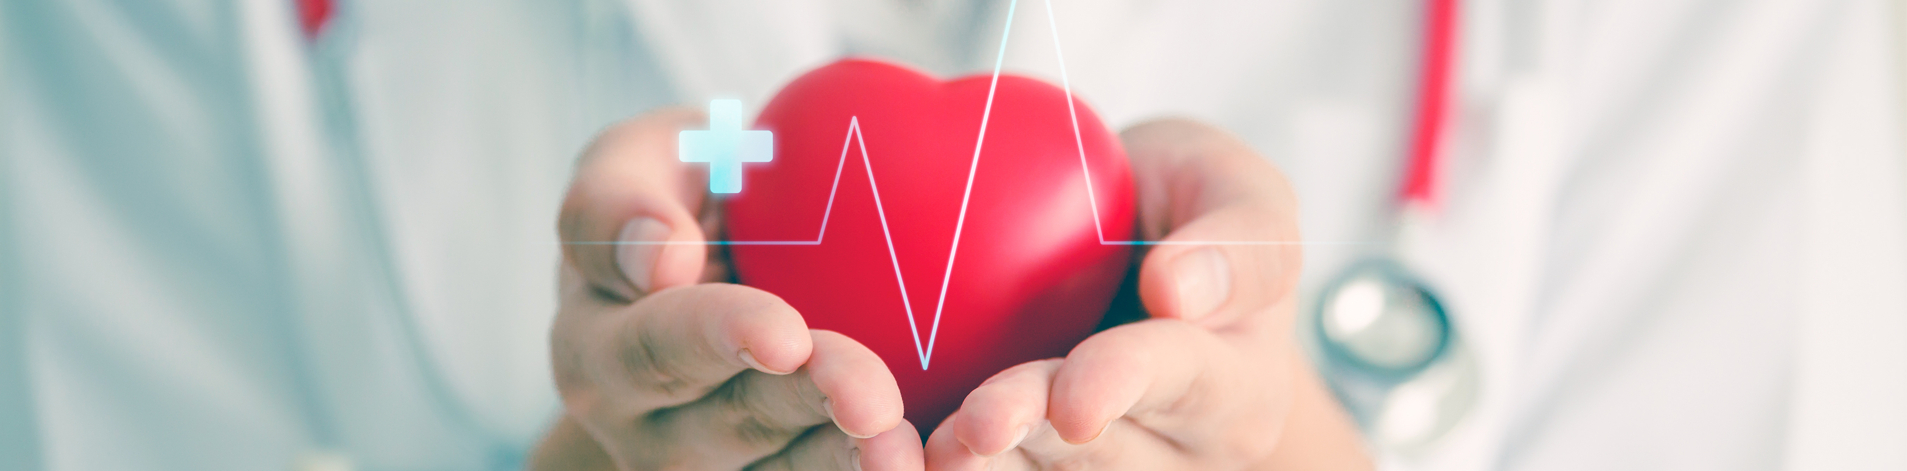

##Sumário 
1. Introdução
2. Análise Exploratória (histogramas, correlação,etc)
2. Preparação de dados (normalização, ajustes)
4. Aplicar o modelo de regressão logistica
5. Conclusão

## Introdução

> Esse projeto é uma atividade do curso de Qualificação em *Data Analytics* e *Machine Learning* e ele objetiva a construção de modelo de Regressão Logística para predição de doenças cardíacas. Pretende-se com ele aferir a absorção dos conteúdos abordados nos módulos 2 e 3 do curso.

O dataset analisado nesse projeto contém dados sobre o diagnóstico de doenças cardíacas que foram ontidos dos quatro locais a seguir: 
1. Cleveland Clinic Foundation 
2. Instituto Húngaro de Cardiologia, Budapeste
3. V.A. Centro Médico, Long Beach, CA
4. Hospital Universitário, Zurique, Suíça

Obs.: Todos os atributos possuem valor numérico. 


**Informações Gerais do Dataset:**

*   Criadores:
       - Instituto Húngaro de Cardiologia. Budapeste: Andras Janosi, M.D.
       - University Hospital, Zurique, Suíça: William Steinbrunn, M.D.
       - University Hospital, Basel, Suíça: Matthias Pfisterer, M.D.
       - V.A. Centro Médico, Long Beach e Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
*   Data: Julho de 1988

> Clique [aqui](https://archive.ics.uci.edu/ml/datasets/heart+Disease) para acessá-lo.

**O datset possui 14 atributos que são descritos abaixo:**

* age: idade em anos
* sex: sexo (1 = masculino; 0 = feminino)
* cp: tipo de dor no peito
  - Valor 0: angina típica
  - Valor 1: angina atípica
  - Valor 2: dor não anginosa
  - Valor 3: assintomático
* trestbps: pressão arterial em repouso (em mm Hg na admissão ao hospital)
* chol: colesterol sérico em mg/dl
* fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = true; 0 = false)
* restecg: resultados eletrocardiográficos em repouso
  - Valor 0: normal
  - Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)
  - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
* thalach: frequência cardíaca máxima alcançada
* exang: angina induzida por exercício (1 = sim; 0 = não)
* oldpeak = Depressão de ST induzida por exercício em relação ao repouso
* slope: a inclinação do pico do segmento ST do exercício
  - Valor 1: ascendente
  - Valor 2: plano
  - Valor 3: descendente
* ca: número de vasos principais (0-3) coloridos por fluoroscopia
* thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
* num: diagnóstico de doença cardíaca (estado angiográfico da doença)
  - Valor 0: < 50% de estreitamento do diâmetro (saudável)
  - Valor 1: > 50% de estreitamento do diâmetro (doente)

## Análise Explanatória

Nessa seção é analisado e investigado o conjunto de dados para resumir suas principais características através de estatísticas e representações gráficas. Assim poderão ser identificados quaisquer ajustes necessários para criação do modelo.

### Visão Geral

Inicialmente, foram realizados 3 passos:
1. A importação das bibliotecas que serão utilizadas;
2. A importação do dataset para um dataframe da biblioteca *pandas* para possibilitar a manipulação desses dados;
3. O terceiro foi a visualização do formato do dataset, especificamente o número de linhas e colunas e as 10 primeiras e últimas entradas.

In [ ]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# importando dataset para um dataframe
dados = "https://raw.githubusercontent.com/victor-ferreira/dataset/main/exercicio2.csv"
df = pd.read_csv(dados)

In [ ]:
# visualizar primeiras entradas
print("Formato do dataset: {}\n".format(df.shape))
df.head(10)

Formato do dataset: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# visualizar últimas entradas
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


A partir disso, já é possível ter uma visão geral do tamanho e tipo de dados que estão contidos no dataset. Percepe-se, portanto, que trata-se de uma base pequena, onde os dados aparentam ser numéricos.
Para confirmar essa última afirmação, foi utilizado o método abaixo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


É possivel constatar que de fato os dados são números, sendo treze deles inteiros e um decimal. Isso é excelente para o modelo de regressão que será construído, pois precisa desses dados numéricos, mesmo em variáveis de classificação. Dessa forma, não é necessário nenhuma conversão de tipos.

### Valores Nulos

Outro passo importante tomado é a verificação da existência de valores nulos na base de dados, já que dados incompletos ou faltantes não possuem muito valor para a análise. Com esse fim, foi utilizado o método abaixo.

In [ ]:
# verificar a quantidade de valores nulos por coluna
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dessa forma, conclui-se que nenhuma das entradas possui valor nulo, o que é muito bom. Isso evita a necessidade de tratar esses dados indesejados.

### Distribuição das classes

A distribuição das classes-alvo é um fator que influencia muito a eficiência do modelo, pois caso haja uma disparidade muito grande entre elas o desempenho do modelo pode ser afetado diretamente. Isso justifica o porquê de ser preciso levá-lo em consideração. Para visualizar essa distribuição de classes no dataset foi utilizado o *countplot*.

1    165
0    138
Name: target, dtype: int64


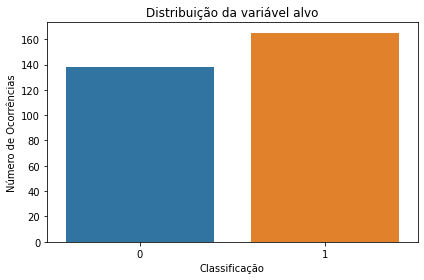

In [ ]:
print(df['target'].value_counts())

fig, ax = plt.subplots()

sns.countplot(x="target", data=df, ax=ax)
ax.set_title("Distribuição da variável alvo")
ax.set_xlabel("Classificação")
ax.set_ylabel("Número de Ocorrências")

plt.tight_layout()

Percebe-se que apesar da diferença entre a quantidade de ocorrências entre as classes, ela não apresenta uma discrepância muito grande entre elas. A aplicação de uma balanceamento pode ser avaliado, mas não aparenta ser necessário para esse conjunto de dados. 

Ademais, foram utilizados histogramas para exibir também a distribuição das outras classes.

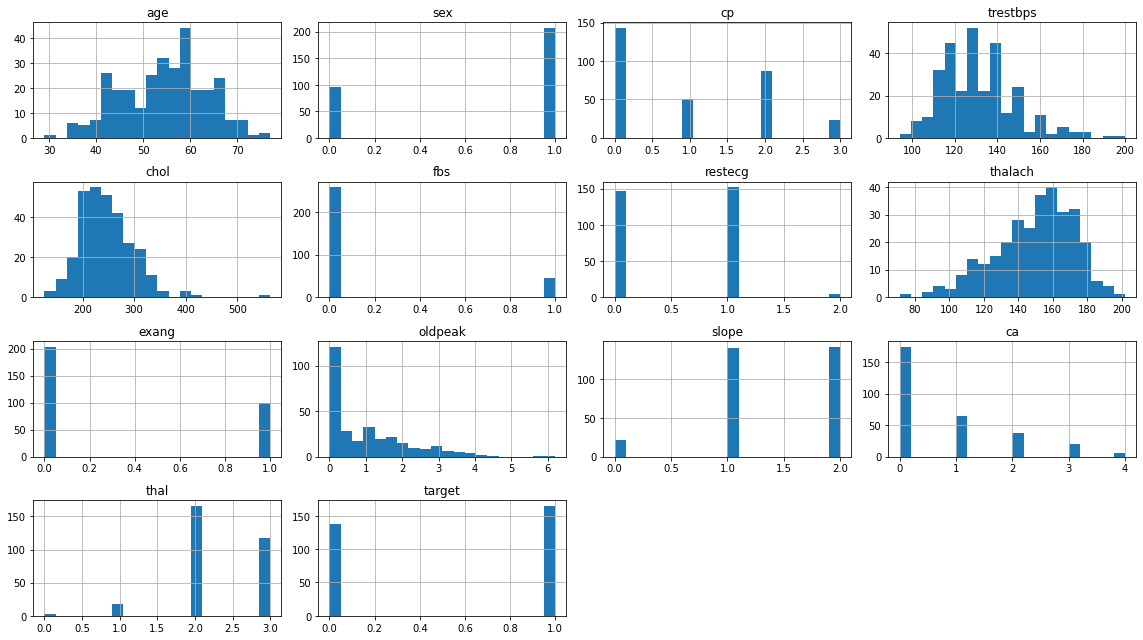

In [ ]:
df.hist(figsize=(16,9), bins=20)
plt.tight_layout()

A partir dessa visualização geral, consegue-se observar quais valores de cada variável são mais e menos frequentes. Infere-se , por exemplo, que a maior parte dos dados são de pessoas com cerca de 60 anos e que a proporção entre os sexos feminino e masculino é de 1:2.

### Correlação

Conhecidas as classes, foi então verificado como elas se relacionam entre si e com a variável alvo ('*target*'). com essa finalidade, foi realizada a análise de correlação.

A análise de correlação possibilita medir o grau de dependência entre variáveis, ou seja, quanto uma interfere em outra. Para essa análise será utilizado o coeficiente de Pearson que mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

- Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

- Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

- Não há correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

Primeiramente, foi preciso criar uma matriz de correlação utilizando esse coeficiente. Para isso, foi utilizada a função corr() da biblioteca pandas.

In [ ]:
# criar uma matriz de correlação
correlation = df.corr()

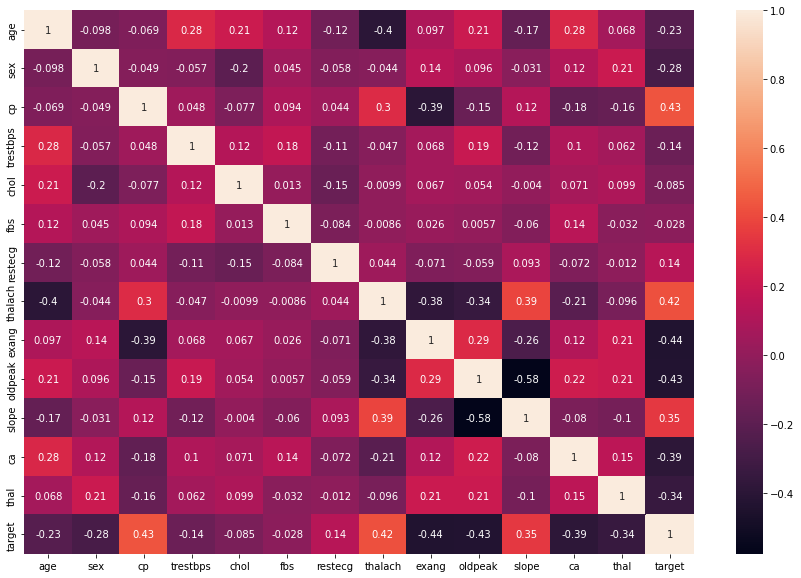

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True)
plt.show()

Observando o gráfico, pode-se afirmar que nenhuma das colunas possui uma correlação muito forte. E que as classes que possuem mais correlação com a variável alvo são *cp* e *thalach*. É interessante, por tanto, observar por outro ponto de vista como ocorre essa relação.

### Gráficos de densidade

Com base no que foi visto na análise de correlação, pose-se afirmar que as variáveis *cp* e *thalach* influenciam diretamente a variável *target*. Para visualizar melhor isso foram utilizados gráficos de densidade. 

Esse tipo de gráfico ajuda a visualizar não apenas a distribuição das variáveis para cada uma das classificações.

In [ ]:
# Dividindo dataset entre as classes-alvo
columns = df.drop(['target'], axis=1).columns
df_target0 = df.query('target == 0')
df_target1 = df.query('target == 1')

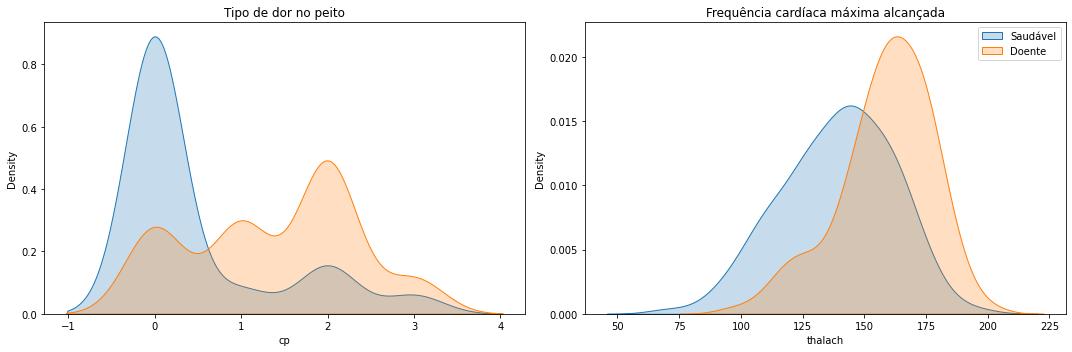

In [ ]:
# plotar gráficos de densidade para as classes com maior correlação
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.kdeplot(df_target0['cp'], shade=True, ax=ax1, label="Saudável")
sns.kdeplot(df_target1['cp'], shade=True, ax=ax1, label="Doente")
ax1.set_title('Tipo de dor no peito')

sns.kdeplot(df_target0['thalach'], shade=True, ax=ax2, label="Saudável")
sns.kdeplot(df_target1['thalach'], shade=True, ax=ax2, label="Doente")
ax2.set_title('Frequência cardíaca máxima alcançada')

#adiciona legenda ao gráfico
plt.legend()

plt.tight_layout()  

Analisando separadamente cada uma das variáveis:

 - "Tipo de dor no peito": a visualização indica que pessoas saúdaveis, em sua maioria possuem o valor 0 que indica "angina típica". Os doentes apresentam uma distribuição parecida para os valores 0 e 1, tendo uma maior concentração no 3 que é assintomático.
 - "Frequência cardíaca máxima alcançada": para pessoas saudáveis o valor fica em geral próximo de 150, já para a maioria dos doentes o valor chega próximo dos 175. O que indica que pacientes com doença possuem picos mais elevados de batimentos cardíacos.

Outras variáveis observadas foram *age* e *sex*, como pode ser visto abaixo.

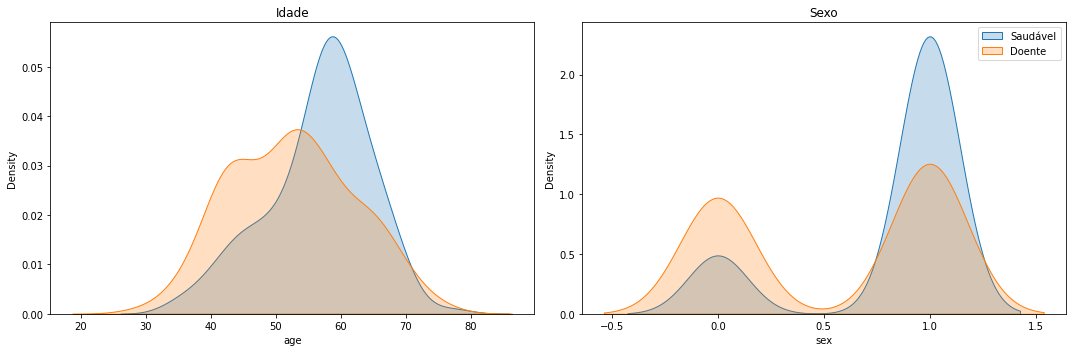

In [ ]:
# plotar gráficos de densidade para as classes Idade e Sexo

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.kdeplot(df_target0['age'], shade=True, ax=ax1, label="Saudável")
sns.kdeplot(df_target1['age'], shade=True, ax=ax1, label="Doente")
ax1.set_title('Idade')

sns.kdeplot(df_target0['sex'], shade=True, ax=ax2, label="Saudável")
sns.kdeplot(df_target1['sex'], shade=True, ax=ax2, label="Doente")
ax2.set_title('Sexo')

#adiciona legenda ao gráfico
plt.legend()

plt.tight_layout()  

Analisando separadamente as variáveis:
 - "Idade": existe uma concentração bem expressiva de pessoas doentes nos 60 anos.
 - "Sexo": a maioria dos homens (1) são saudáveis, enquanto as mulheres (0) em sua maioria são doentes.



## Preparação dos dados

Nessa seção são aplicados os ajustes considerados necessários para que o modelo seja criado da melhor forma possível.


### Separação do dataset

Primeiramente, o conjunto de dados foi dividido para que fosse possível: (1) utilizar uma parte para treinar o modelo a ser construído e (2) validá-lo com outra parte a qual ele não tem conhecimento. Esses dados representariam informações novas que o modelo receberia em uma situação real. 

Essa técnica ajuda na identificação de problemas como o *overfitting* que ocorre quando o modelo aprende muito bem com os exemplos passados e apresenta métricas boas, mas quando colocado a prova apresenta resultados bem inferiores aos esperados.

Com ajuda do método *sample*, 15% do dataset foi separado para os treinos de forma aleatória.

In [ ]:
# separar dados para cosntrução e validação do modelo
test = df.sample(frac=0.10, random_state=0)
df.drop(test.index, inplace=True)
test.shape

(30, 14)

In [ ]:
# exibindo formato do dataset após da separação
df.shape

(273, 14)

### Normalização dos dados

 A normalização de dados busca mudar os valores das colunas numéricas do dataset para que tenham uma escala em comum, sem que sejam distorcidas as diferenças de intervalos dos valores e sem perder informações. Ela é necessária para alguns algoritmos afim de modelar os dados corretamente.

 A exemplo temos as colunas de *sex* e *chol*, uma possui os valores 0 e 1 e a outra possui valores entre 0 e 600. É uma diferença considerável de intervalos, isso pode pode causar problemas ao tentar combinar os valores como recursos durante a modelagem.

Por esse motivo, foi feita a normalização de todos as colunas, inclusive do dataframe de teste. Para isso, foi utilizado o *StandardScaler*.

In [ ]:
# importa o scaler
from sklearn.preprocessing import StandardScaler

#cria cópias dos datasets
df_norm = df.copy()
test_norm = test.copy()

# instancia o scaler
scaler = StandardScaler()

In [ ]:
# normaliza os dados de treino
df_norm[df_norm.columns[:-1]] = scaler.fit_transform(df_norm[df_norm.columns[:-1]])

#visualizar dataframe após normalização
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936187,0.707107,1.962264,0.771602,-0.267326,2.449490,-0.984924,-0.003876,-0.707107,1.079142,-2.310590,-0.702324,-2.081408,1
1,-1.921901,0.707107,0.991797,-0.101487,0.054505,-0.408248,0.908627,1.627543,-0.707107,2.100600,-2.310590,-0.702324,-0.448579,1
2,-1.482195,-1.414214,0.021329,-0.101487,-0.816331,-0.408248,-0.984924,0.966157,-0.707107,0.313048,0.957758,-0.702324,-0.448579,1
3,0.166702,0.707107,0.021329,-0.683547,-0.210532,-0.408248,0.908627,1.230711,-0.707107,-0.197682,0.957758,-0.702324,-0.448579,1
4,0.276628,-1.414214,-0.949139,-0.683547,2.023353,-0.408248,0.908627,0.569325,1.414214,-0.367925,0.957758,-0.702324,-0.448579,1


In [ ]:
# normaliza os dados de treino
test_norm[test_norm.columns[:-1]] = scaler.fit_transform(test_norm[test_norm.columns[:-1]])

#visualizar dataframe após normalização
test_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
225,1.915495,0.447214,-0.846228,0.715288,-1.619454,-0.5,0.816497,-0.854668,1.658312,1.488413,-2.013996,-0.831028,0.707107,0
152,1.227293,0.447214,2.083023,1.951384,-0.288052,-0.5,-1.224745,0.387984,-0.603023,-0.504997,-0.423999,-0.831028,0.707107,1
228,0.653792,0.447214,2.083023,1.951384,1.244317,-0.5,-1.224745,0.553670,-0.603023,-0.903679,-0.423999,-0.831028,0.707107,0
201,0.768492,0.447214,-0.846228,-0.273589,0.490693,-0.5,-1.224745,-0.191921,1.658312,1.687754,-0.423999,0.166206,0.707107,0
52,0.997893,0.447214,1.106606,-0.026370,-0.187569,-0.5,0.816497,0.015188,-0.603023,0.691049,-0.423999,2.160673,0.707107,1


## Aplicação do modelo

Por fim, foi aplicado o modelo de regressão logística para previsão de novos casos. Essa técnica é recomendada para situações onde a variável dependente é binária, que é o caso do dataset utilizado.

In [ ]:
#importando bibliotecas a serem utilizadas
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

Após as bibliotecas serem importadas, o primeiro passo foi separar os dados de treino e teste para o modelo.

In [ ]:
# separar os dados de treino e teste
X = df_norm.drop('target', axis=1)
y = df_norm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

Com os dados separados, o próximo passo foi instanciar o modelo e pensar a cerca dos parâmetros a serem utilizados.

Para esse fim, foi utilizado o *GridSearchCV* que realiza uma busca exaustiva pelos valores de parâmetros especificados para um estimador. Com isso, ele pode auxiliar na identificação dos melhores parâmetros para um determinado modelo.

O primeiro parâmetro delimitado foi o *solver*, sendo escolhido o '*liblinear*', pois como indica a propria documentação do [skckit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), esse é o melhor para bases pequenas.

Os outros 2 parâmetros a serem delimitados são *penalty* e *C*. 

Devido a escolha do *solver* '*liblinear*', o penalty pode ser 'l1' ou 'l2'.

Quanto ao *C*, ele pode assumir diversos valores de *float*. Como existem uma quantidade infinita, foram gerados alguns valores aleatórios com ajuda de uma junção da biblioteca *numpy*.

In [ ]:
log_reg = LogisticRegression(solver='liblinear')

params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 50)
}

Considerando a utilização da regressão linear e os tipos de dados do dataset, foram utilizadas as seguintes métricas para a avaliação do modelo:

Accuracy: representa o quantidade de previsões corretas sobre todas as previsões realizadas pelo modelo;

Recall: representa quantos casos positivos reais foram previstos corretamente pelo modelo (porque no diagnóstico médico é mais importante reduzir resultados falsos negativos);

AUC-ROC: representa o quão bem o modelo criado pode distinguir entre as duas classificações. O valor do AUC vai de 0 a 1 e quanto maior esse valor, melhor.

O uso do *GridSearchCV* possibilitou que fossem encontrados os melhores valores para *C* e *penalty* para cada uma dessas métricas, como pode ser visto abaixo.

In [ ]:
scoring_list = ['accuracy', 'recall', 'roc_auc']

for i in range(len(scoring_list)):
    scoring = scoring_list[i]
    grd = GridSearchCV(log_reg, params, scoring=scoring, cv=10)
    grd.fit(X_train, y_train)
    print(scoring.capitalize())
    print()
    print('Melhor Penalty para {}: '.format(scoring), grd.best_estimator_.get_params()['penalty'])
    print('Melhor C para {}: '.format(scoring), grd.best_estimator_.get_params()['C'])
    print("---------------------------------------------------------")
    

Accuracy

Melhor Penalty para accuracy:  l2
Melhor C para accuracy:  0.009102981779915217
---------------------------------------------------------
Recall

Melhor Penalty para recall:  l2
Melhor C para recall:  0.02811768697974228
---------------------------------------------------------
Roc_auc

Melhor Penalty para roc_auc:  l2
Melhor C para roc_auc:  0.0029470517025518097
---------------------------------------------------------


Para as três métricas o *penalty* '*l2*' teve os melhores resultados, então ele foi o escolhido. Além disso, 'C' apresentou valores diferentes para cada uma das métricas, mas como no diagnóstico é mais importante os valores positivos reais então foi priorizado o valor apresentado pelo "*Recall*" que é 0.05963623316594643.

Com os valores dos parâmetros definidos, foi realizada a criação e treinamento do modelo.

In [ ]:
#instaciar e escolher os hiperparametros
model = LogisticRegression(solver="liblinear", penalty="l2", C=0.02811768697974228)

# realizar o treinamento do modelo
model.fit(X_train, y_train)

#fazer as previsões em cima dos novos dados
y_pred = model.predict(X_test)

Após a finalização do treinamento do modelo, foram observados os resultados obtidos.

In [ ]:
# classification report 
print(classification_report(y_test, y_pred))

print('AUC: %0.2f' % roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.84      0.92      0.88        39

    accuracy                           0.86        69
   macro avg       0.86      0.84      0.85        69
weighted avg       0.86      0.86      0.85        69

AUC: 0.84


Para auxiliar a visualização, também foi definido uma função para visualização da curva ROC que representa visualmente o valor apresentado pela métrica *roc_auc_score*.

In [ ]:
# função para plotar curva ROC 
def plot_roc_curve(y_true, y_pred, figsize=(10,6)):
  fpr, tpr, _ = roc_curve(y_true, y_pred)
  plt.figure(figsize=figsize)
  auc_value = roc_auc_score(y_true, y_pred)
  plt.plot(fpr, tpr, color='orange', label='Curva ROC (area = %0.2f)' % auc_value)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva de Característica Operacional do Receptor (ROC)')
  plt.legend()
  plt.show()

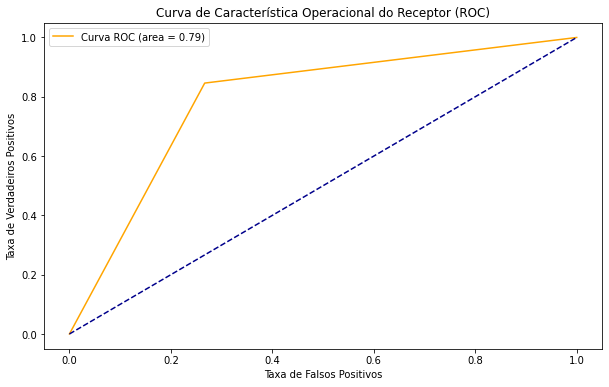

In [ ]:
# plotar curva ROC
plot_roc_curve(y_test, y_pred)

Pro fim, floi plotada  matriz de confusão para observação dos valores previstos vs verdadeiros.

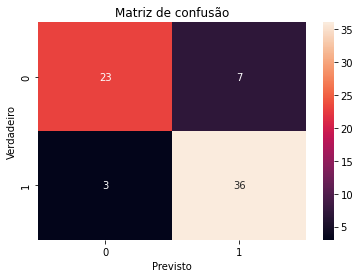

In [ ]:
# plotar a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Matriz de confusão')
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro')

plt.show()

### Avaliando resultados do modelo com os dados de teste

Como última etapa, foi utilizado os 15% do dataset separado no início para fazer um teste com o modelo produzido. Os resultados gerados permitem que o desempenho real seja verificado, já que eles só são apresentados ao modelo após ele já ter sido construído, simulando previsões reais.

In [ ]:
# separar os dados de treino e teste
X_val = test_norm.drop('target', axis=1)
y_val = test_norm['target']

In [ ]:
#fazer as previsões em cima dos novos dados
y_pred_val = model.predict(X_val)

In [ ]:
# classification report
print(classification_report(y_val, y_pred_val))

# avaliar o desempenho do modelo
print('AUC: %0.2f' % roc_auc_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.71      0.86      0.77        14

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.77        30

AUC: 0.77


Apesar das métricas terem reduzido um pouco, o resultado apresentado é satisfatório.

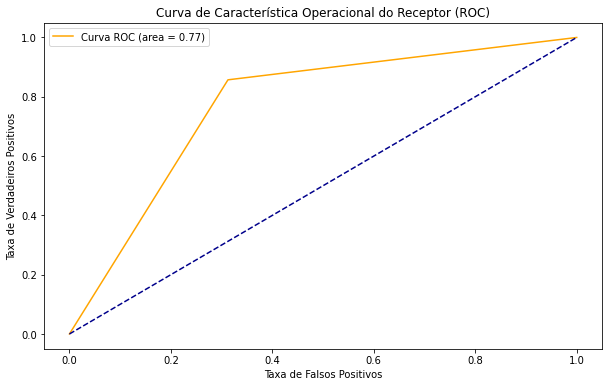

In [ ]:
# plotar curva ROC
plot_roc_curve(y_val, y_pred_val)

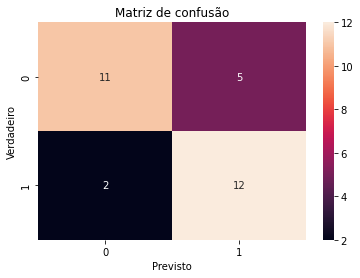

In [ ]:
# plotar a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred_val), annot=True, ax=ax, fmt='d')

ax.set_title('Matriz de confusão')
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro')

plt.show()

## Conclusão

Com base na análise realizada nesse projeto, foi possível concluir que:

- O dataset análisado apesar de pequeno, possui dados tratados, balanceados e sem nenhum valor nulo, o que facilitou bastante o trabalho executado;
- As classes que possuem mais correlação com a variável *target* são *cp* (tipo de dor no peito) e *thalach* (frequência cardíaca máxima alcançada);
- Sobre a variável *cp*: a análise indicou que pessoas saúdaveis, em sua maioria possuem o valor 0 que indica "angina típica". Enquanto os doentes apresentam uma distribuição parecida para os valores 0 e 1, tendo uma maior concentração no 3 que é "assintomático".
- Sobre a variável *thalach*: para pessoas saudáveis o valor fica em geral próximo de 150, já para a maioria dos doentes o valor chega próximo dos 175. O que indica que pacientes com doença possuem picos mais elevados de batimentos cardíacos.
- Existe uma concentração bem expressiva de pessoas perto dos 60 anos que estão doentes. 
- As mulheres possuem proporcionalmente mais diagnóstico positivos para doença que os homens.
- No geral, o modelo projetado possuiu um resultado adequado, mas sempre com aberturas a melhorias.